## Subset FWF correction to only the Weddell Sea

In [80]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import sys
sys.path.append('/home/users/birgal/')

In [81]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

Load output from DOMAINcfg tool and edit:

In [82]:
empc_old = xr.open_dataset(f'{base_dir}misc-forcing/AntArc_eORCA025_empc.nc')
empc_new = empc_old.copy()

In [85]:
# mask negative values
empc_new['sowafld'] = xr.where(np.isnan(empc_new['sowafld']), 0, empc_new['sowafld'])
empc_new['sowafld'] = xr.where(empc_new['sowafld'] < 0, 0, empc_new['sowafld'])
empc_new['sowafld'] = xr.where((empc_new['nav_lon'] > 50) | (empc_new['nav_lon'] < -61), 0, empc_new['sowafld'])
empc_new['sowafld'] = xr.where(np.abs(empc_new['sowafld']) < 1e-5, 0, empc_new['sowafld'])
empc_new['sowafld'] = xr.where((empc_new['nav_lat'] > -55), 0, empc_new['sowafld'])

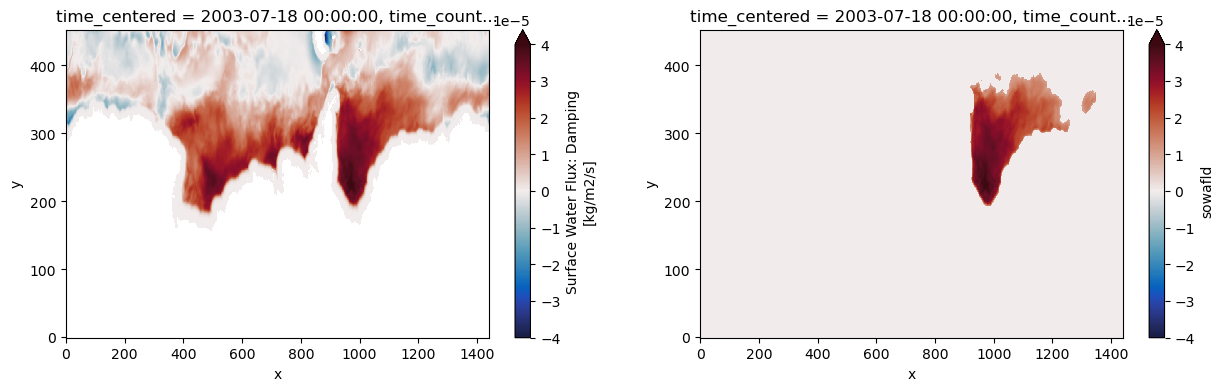

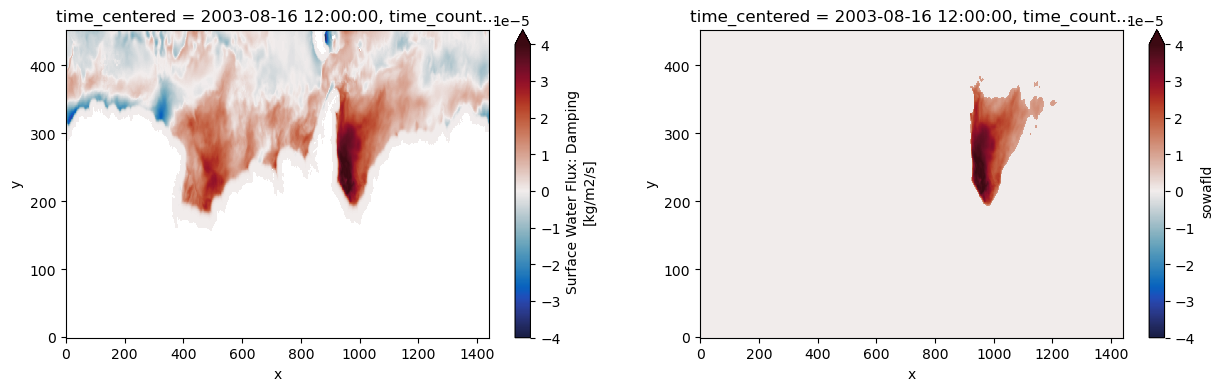

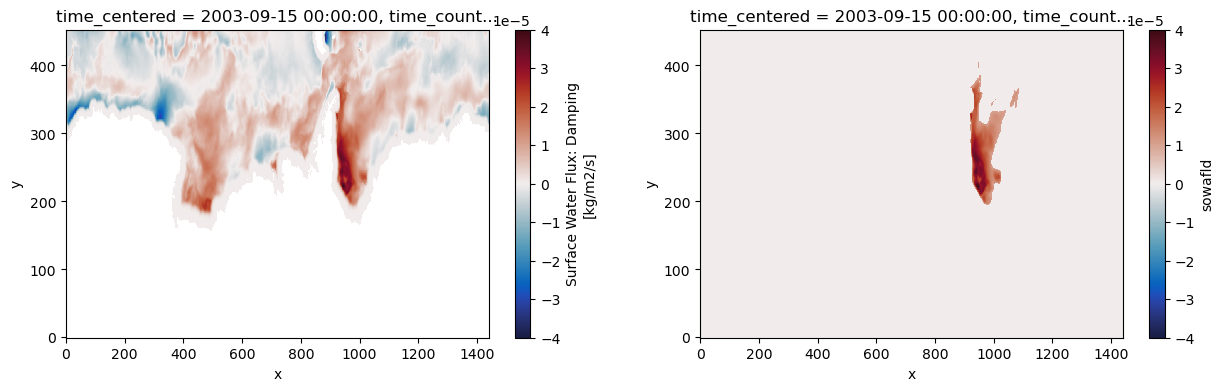

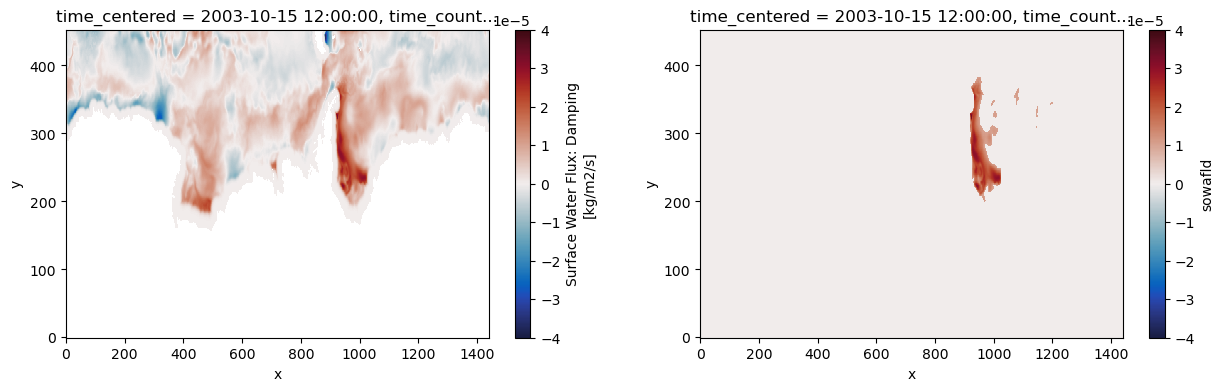

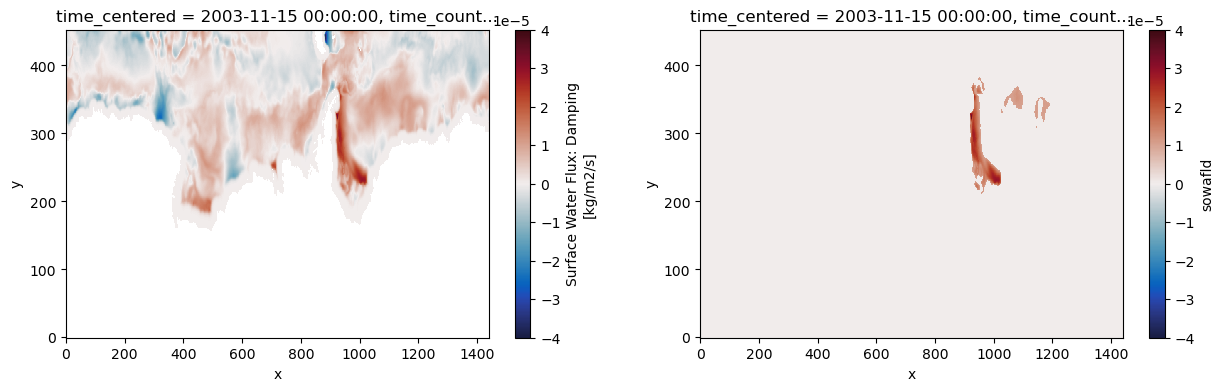

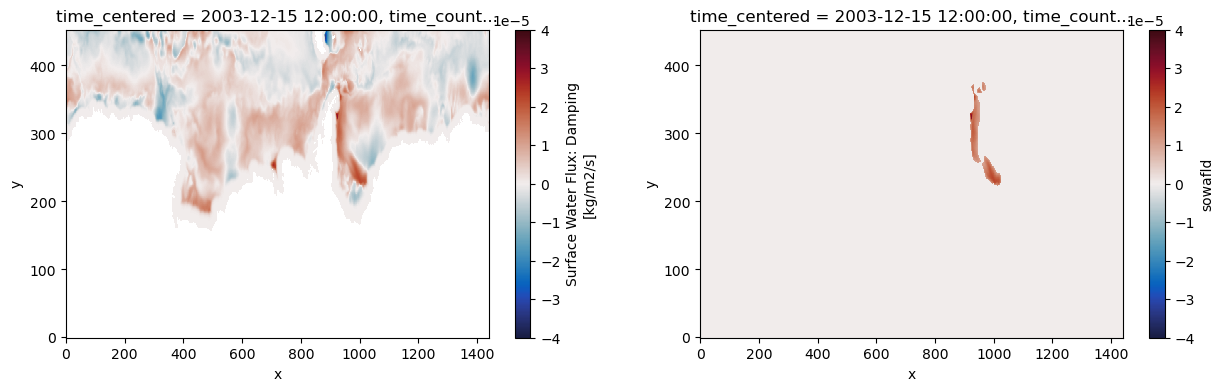

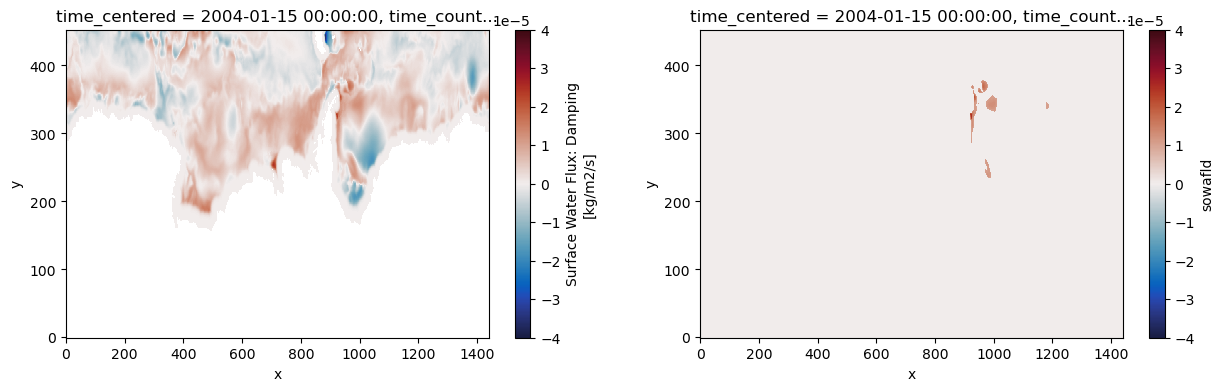

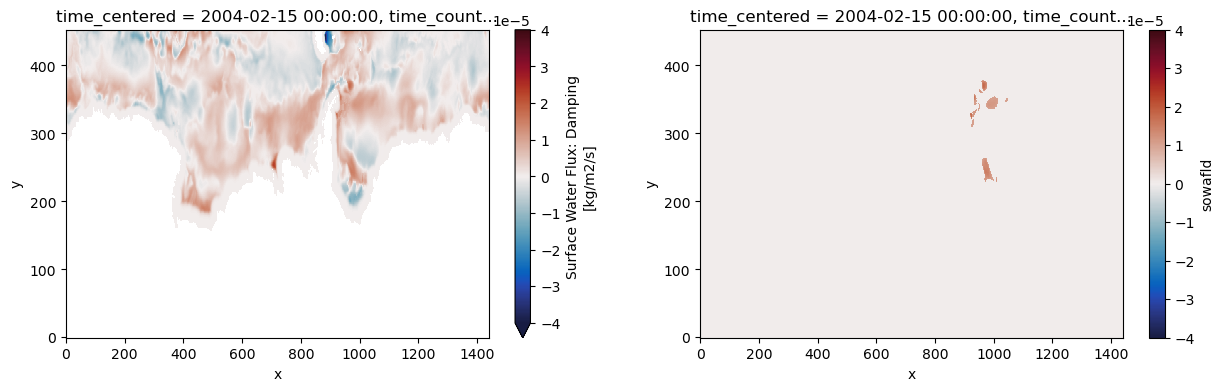

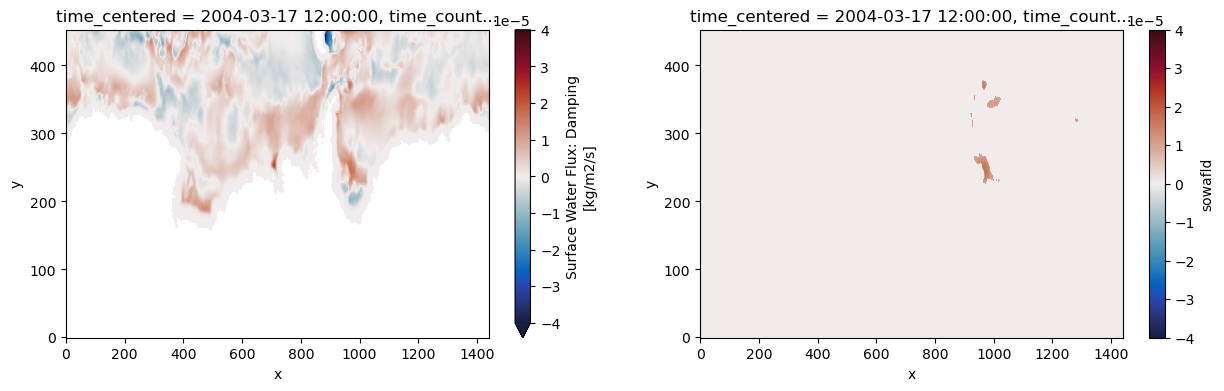

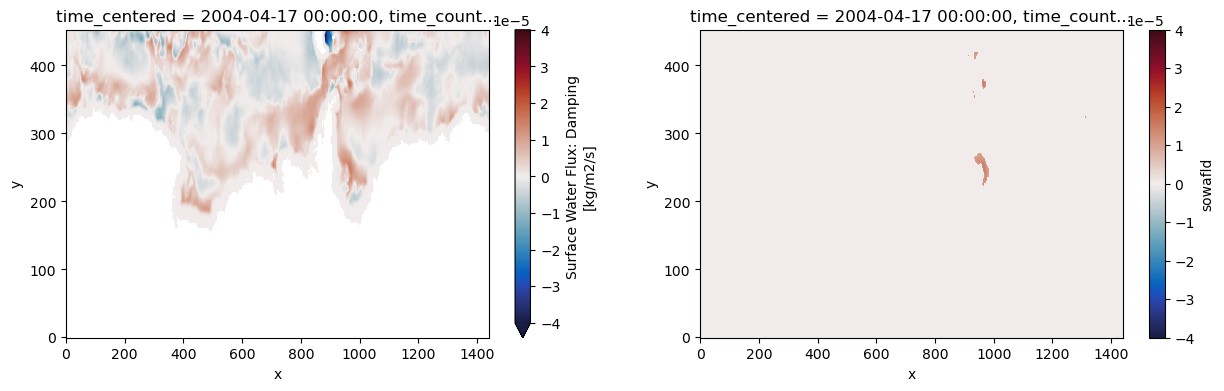

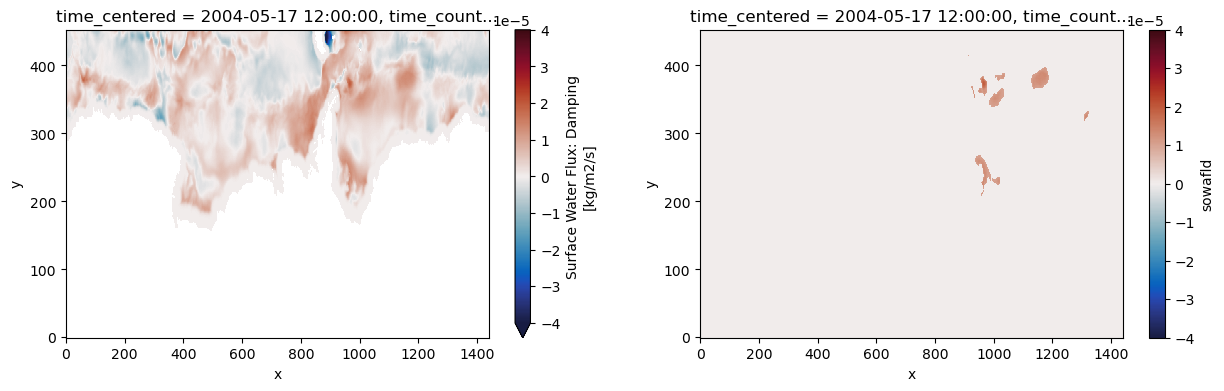

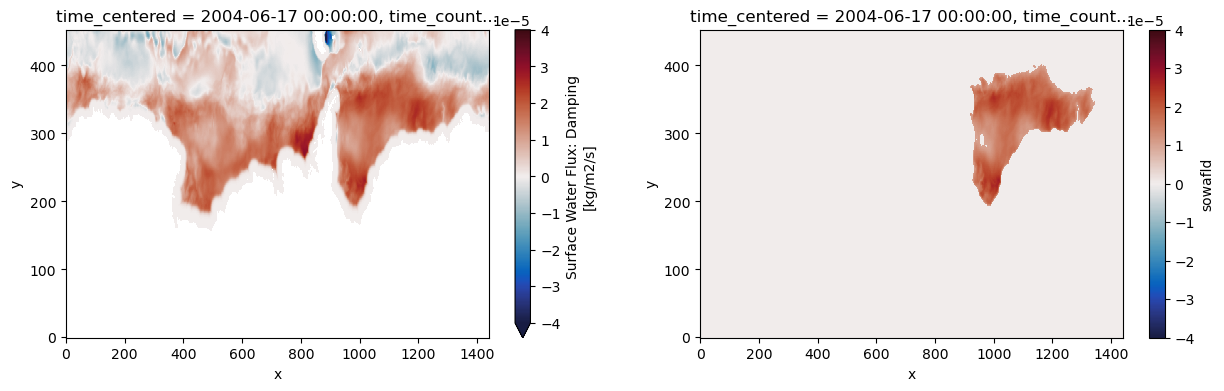

In [92]:
for month in range(0,12):
    fig, ax = plt.subplots(1,2, figsize=(15,4))
    empc_old.sowafld.isel(time_counter=month).plot(ax=ax[0], vmin=-4e-5, vmax=4e-5, cmap=cmocean.cm.balance)
    empc_new.sowafld.isel(time_counter=month).plot(ax=ax[1], vmin=-4e-5, vmax=4e-5, cmap=cmocean.cm.balance)

In [89]:
empc_new['sowafld'] = empc_new['sowafld'].transpose('time_counter','y','x') 

In [90]:
empc_new

<xarray.Dataset> Size: 37MB
Dimensions:        (y: 453, x: 1440, time_counter: 12)
Coordinates:
    nav_lat        (y, x) float32 3MB -1.0 -1.0 -1.0 ... -50.06 -50.06 -50.06
    nav_lon        (y, x) float32 3MB -1.0 -1.0 -1.0 -1.0 ... 72.25 72.5 72.75
    time_centered  (time_counter) object 96B 2003-07-18 00:00:00 ... 2004-06-...
  * time_counter   (time_counter) object 96B 2003-07-18 00:00:00 ... 2004-06-...
Dimensions without coordinates: y, x
Data variables:
    sowafld        (time_counter, y, x) float32 31MB 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [91]:
empc_new.to_netcdf(f'{base_dir}AntArc_eORCA025_empc_weddell.nc', unlimited_dims=['time_counter'])